<a href="https://colab.research.google.com/github/shizacharania/Brain-Tumour-Grading/blob/main/TumourGrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import files
# files.upload()

In [2]:
!gdown --id 1OLCl6_OrEPl7vyzFekK6dCDPhl53QghX

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1OLCl6_OrEPl7vyzFekK6dCDPhl53QghX
To: /content/brain_tumour_grading_data_small.zip
100% 24.2M/24.2M [00:00<00:00, 132MB/s]


In [3]:
!unzip /content/brain_tumour_grading_data_small.zip

Archive:  /content/brain_tumour_grading_data_small.zip
   creating: brain_tumour_grading_data_small/
  inflating: __MACOSX/._brain_tumour_grading_data_small  
  inflating: brain_tumour_grading_data_small/.DS_Store  
  inflating: __MACOSX/brain_tumour_grading_data_small/._.DS_Store  
   creating: brain_tumour_grading_data_small/grade3/
   creating: brain_tumour_grading_data_small/grade4/
   creating: brain_tumour_grading_data_small/grade2/
  inflating: brain_tumour_grading_data_small/grade3/5.000000-AXIAL_T1_PRE_GD-61134_AXIAL_T1_PRE_GD_5_brain.nii  
  inflating: __MACOSX/brain_tumour_grading_data_small/grade3/._5.000000-AXIAL_T1_PRE_GD-61134_AXIAL_T1_PRE_GD_5_brain.nii  
  inflating: brain_tumour_grading_data_small/grade3/5.000000-AXIAL_T1_PRE_GD-85690_AXIAL_T1_PRE_GD_5_brain.nii  
  inflating: __MACOSX/brain_tumour_grading_data_small/grade3/._5.000000-AXIAL_T1_PRE_GD-85690_AXIAL_T1_PRE_GD_5_brain.nii  
  inflating: brain_tumour_grading_data_small/grade3/5.000000-AXIAL_T1_PRE-GAD.-5576

In [4]:
# getting the file paths for gr2 images, gr3 images, and gr4 images - examples:
# grade 2: /content/brain_tumour_grading_data_small/grade2/1.000000-AXIAL_T1_POST_GD-55708_AXIAL_T1_POST_GD_1_brain.nii
# grade 3: /content/brain_tumour_grading_data_small/grade3/2.000000-AXIAL_T2-79698_AXIAL_T2_2_e1_brain.nii
# grade 4: /content/brain_tumour_grading_data_small/grade4/1.000000-AXIAL_T1_POST_GD-81414_AXIAL_T1_POST_GD_1_brain.nii

In [5]:
import os

grade2_rootpath = "/content/brain_tumour_grading_data_small/grade2"
grade3_rootpath = "/content/brain_tumour_grading_data_small/grade3"
grade4_rootpath = "/content/brain_tumour_grading_data_small/grade4"

grade2_filepaths = os.listdir(grade2_rootpath)
grade3_filepaths = os.listdir(grade3_rootpath)
grade4_filepaths = os.listdir(grade4_rootpath)

grade2_filepaths.remove('.DS_Store')
grade3_filepaths.remove('.DS_Store')
grade4_filepaths.remove('.DS_Store')

print("There are " + str(len(grade2_filepaths)) + " grade 2 files")
print(grade2_filepaths)
print("There are " + str(len(grade3_filepaths)) + " grade 3 files")
print(grade3_filepaths)
print("There are " + str(len(grade4_filepaths)) + " grade 4 files")
print(grade4_filepaths)

There are 10 grade 2 files
['4.000000-AXIAL_T1-45172_AXIAL_T1_4_brain.nii', '5.000000-AXIAL_T1_PRE_GD-04080_AXIAL_T1_PRE_GD_5_brain.nii', '5.000000-AXIAL_T1_PRE_GD-00202_AXIAL_T1_PRE_GD_5_brain.nii', '5.000000-AXIAL_T1_PRE_GD-06516_AXIAL_T1_PRE_GD_5_brain.nii', '1.000000-AXIAL_T1_POST_GD-55708_AXIAL_T1_POST_GD_1_brain.nii', '5.000000-AXIAL_T1_POST_GAD.-46431_AXIAL_T1_POST_GAD._5_brain.nii', '2.000000-AXIAL_VARIABLE_ECHO_PDT2-74529_AXIAL_VARIABLE_ECHO_PD_T2_2_e2_brain.nii', '1.000000-AXIAL_T1_POST_GD-70447_AXIAL_T1_POST_GD_1_brain.nii', '5.000000-AXIAL_T1_PRE_GD-09302_AXIAL_T1_PRE_GD_5_brain.nii', '2.000000-AXIAL_VARIABLE_ECHO_PDT2-74529_AXIAL_VARIABLE_ECHO_PD_T2_2_e1_brain.nii']
There are 10 grade 3 files
['5.000000-AXIAL_T1_PRE_GD-61134_AXIAL_T1_PRE_GD_5_brain.nii', '5.000000-axial_t1_pre_gd-70698_axial_t1_pre_gd_5_brain.nii', '5.000000-AXIAL_T1_PRE_GD-85690_AXIAL_T1_PRE_GD_5_brain.nii', '6.000000-AXIAL_T1_PRE_GD-25584_AXIAL_T1_PRE_GD_6_brain.nii', '5.000000-AXIAL_T1_PRE-GAD.-55766_AX

In [6]:
filepaths = []
labels = []

for afilepath in grade2_filepaths:
  filepaths.append(grade2_rootpath + "/" + afilepath)
  labels.append("grade 2")

for afilepath in grade3_filepaths:
  filepaths.append(grade3_rootpath + "/" + afilepath)
  labels.append("grade 3")

for afilepath in grade4_filepaths:
  filepaths.append(grade4_rootpath + "/" + afilepath)
  labels.append("grade 4")

In [7]:
print(filepaths)
print(labels)

print("There are " + str(len(filepaths)) + " files and " + str(len(labels)) + " labels in total.")
print(len(filepaths) == len(labels))

['/content/brain_tumour_grading_data_small/grade2/4.000000-AXIAL_T1-45172_AXIAL_T1_4_brain.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_PRE_GD-04080_AXIAL_T1_PRE_GD_5_brain.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_PRE_GD-00202_AXIAL_T1_PRE_GD_5_brain.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_PRE_GD-06516_AXIAL_T1_PRE_GD_5_brain.nii', '/content/brain_tumour_grading_data_small/grade2/1.000000-AXIAL_T1_POST_GD-55708_AXIAL_T1_POST_GD_1_brain.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_POST_GAD.-46431_AXIAL_T1_POST_GAD._5_brain.nii', '/content/brain_tumour_grading_data_small/grade2/2.000000-AXIAL_VARIABLE_ECHO_PDT2-74529_AXIAL_VARIABLE_ECHO_PD_T2_2_e2_brain.nii', '/content/brain_tumour_grading_data_small/grade2/1.000000-AXIAL_T1_POST_GD-70447_AXIAL_T1_POST_GD_1_brain.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_PRE_GD-09302_AXIAL_T1_PRE_GD_5_bra

In [8]:
print(filepaths[0])
print(filepaths[28])

/content/brain_tumour_grading_data_small/grade2/4.000000-AXIAL_T1-45172_AXIAL_T1_4_brain.nii
/content/brain_tumour_grading_data_small/grade4/5.000000-AXIAL_T1_POST-82637_AXIAL_T1_POST_5_brain.nii


In [9]:
"""
my approach to visualize 3d images:
- use simpleitk (sitk)
   - i need to load the images into sitk format and then convert it into a numpy array

- from a numpy array, i need to do 2 tasks
    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices

look into basics of simpleitk - how to read the file and then convert it into np.array()
look into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio
look into what fatemeh did: https://youtu.be/rBIetBho0x4
"""

'\nmy approach to visualize 3d images:\n- use simpleitk (sitk)\n   - i need to load the images into sitk format and then convert it into a numpy array\n\n- from a numpy array, i need to do 2 tasks\n    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that\n    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices\n\nlook into basics of simpleitk - how to read the file and then convert it into np.array()\nlook into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio\nlook into what fatemeh did: https://youtu.be/rBIetBho0x4\n'

In [10]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 18 kB/s 


In [11]:
import SimpleITK as sitk

In [12]:
img_nparrays = []

for filepath in filepaths:
  img = sitk.ReadImage(filepath) # returns a <class 'SimpleITK.SimpleITK.Image'>
  img = sitk.GetArrayFromImage(img)
  img_nparrays.append(img)
print(len(img_nparrays))

30


(30, 256, 256)
<class 'numpy.ndarray'>


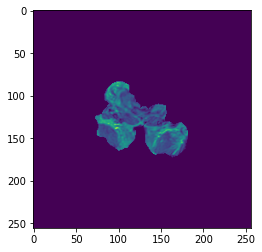

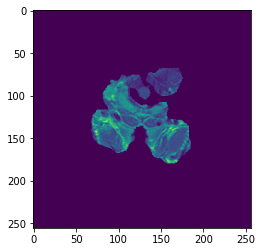

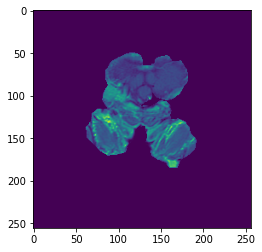

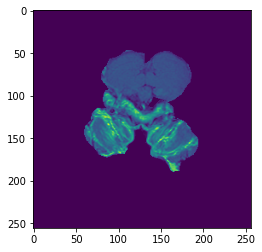

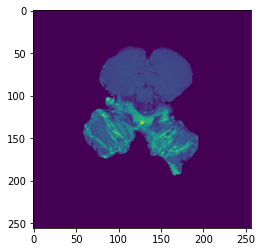

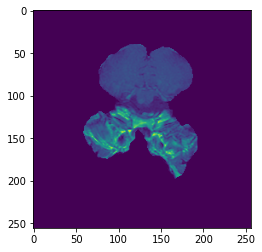

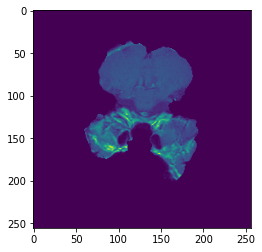

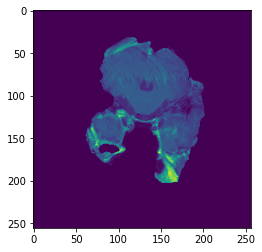

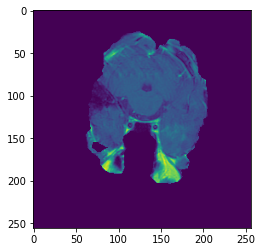

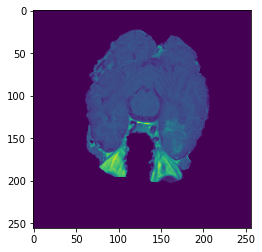

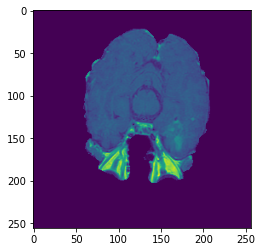

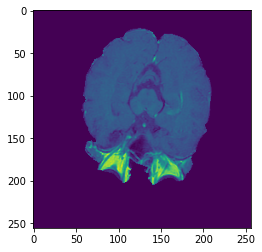

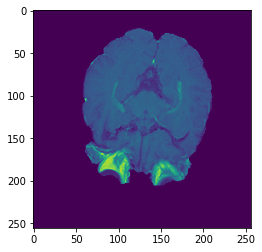

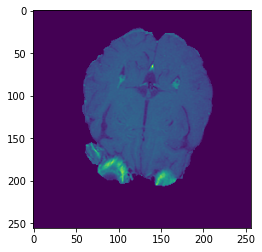

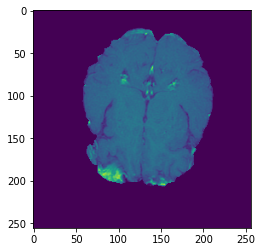

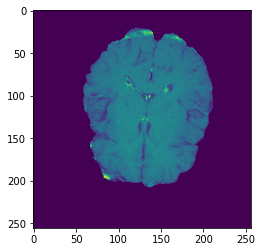

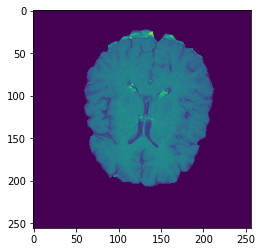

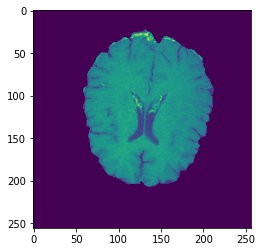

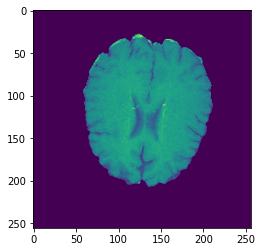

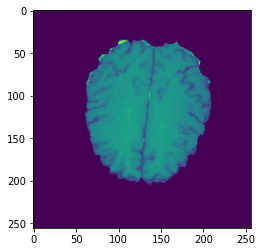

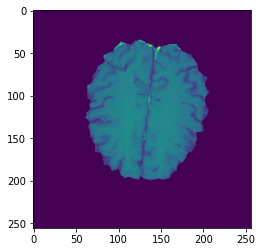

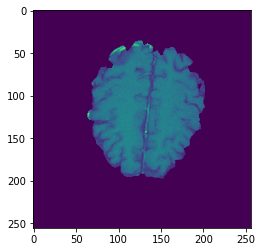

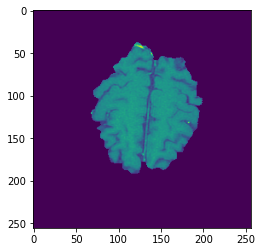

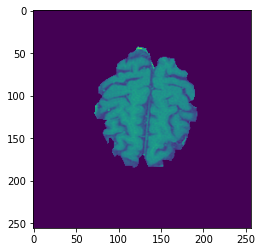

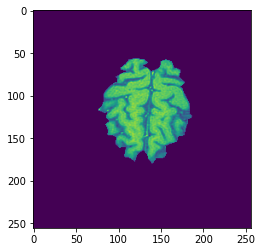

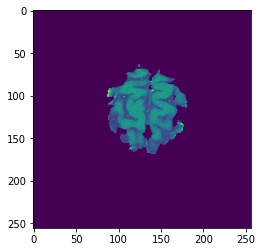

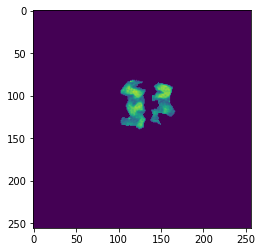

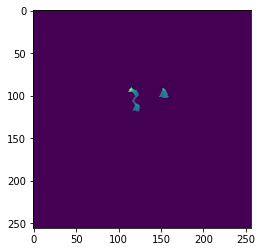

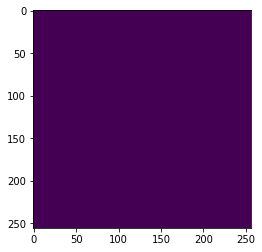

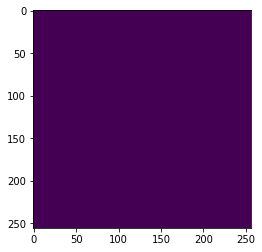

In [13]:
# 1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
import matplotlib.pyplot as plt
import numpy as np

testing_img = img_nparrays[5]
print(testing_img.shape)
print(type(testing_img))

# print(testing_img[:, :, :])

for i in range(testing_img.shape[0]):
  brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()

# print(testing_img[2, :, :].shape)

In [14]:
count = 0
min_slices = img_nparrays[0].shape[0]  # ig you would have to find the fewest amount of slices and then resize it that way

for i in range(len(img_nparrays)):
  img = img_nparrays[i]
  if (img.shape[0] == 3):
    print("HI")
    continue
  print((img_nparrays[i].shape))
  if (img_nparrays[i].shape[0] < min_slices and img.shape[0] != 3):
    min_slices = img_nparrays[i].shape[0];
  count += 1

print(count)
print(min_slices)

(56, 256, 256)
(58, 256, 256)
(58, 256, 256)
(60, 256, 256)
(56, 256, 256)
(30, 256, 256)
(21, 256, 256)
(58, 256, 256)
(57, 256, 256)
(21, 256, 256)
(57, 256, 256)
(55, 256, 256)
(54, 256, 256)
(49, 256, 256)
(58, 256, 256)
(49, 256, 256)
(21, 256, 256)
(21, 256, 256)
(64, 256, 256)
(30, 256, 256)
(20, 256, 256)
(55, 256, 256)
(32, 256, 256)
(23, 256, 256)
(20, 256, 256)
(58, 256, 256)
(30, 256, 256)
(20, 256, 256)
(30, 256, 256)
(20, 256, 256)
30
20


In [15]:
# no slicing through cropping - need to resize volumes

# same_size_arrays = []

# for i in range(len(img_nparrays)):
#   img = img_nparrays[i]
#   if (img.shape[0] == 3):
#     continue
#   print(img.shape)
#   brain_slice = img[:min_slices, :, :]
#   print(brain_slice.shape)
#   print()
#   same_size_arrays.append(brain_slice)

In [16]:
# print(len(same_size_arrays))

In [17]:
# testing_img = same_size_arrays[4]
# print(testing_img.shape)
# print(type(testing_img))

# # print(testing_img[:, :, :])

# for i in range(testing_img.shape[0]):
#   brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
#   plt.imshow(brain_slice)
#   plt.show()
#   plt.close()

In [18]:
# # i took out slices from the ends of the images because I thought/assumed that in the images, the first and last slices of only have sparse information
# #  that's the problem - I ASSUMED, so after making the algorithm, I realized that I shouldn’t have sliced the ends.
# # instead, the last slices are the ones that have sparse information. on the other hand, the first few slices have a lot of information
# # so now i gotta slice out from the last ones

# same_size_arrays2 = []

# for i in range(len(img_nparrays)):
#   img = img_nparrays[i]
#   # print(img.shape)

#   if (img.shape[0] == 3):
#     continue

#   take_out = (img.shape[0]-min_slices)/2;
#   # print(img.shape[0])
#   # print(take_out)
#   if (take_out % 1 == 0):
#     # print("yes")
#     start = int(take_out)
#     end = int(img.shape[0]-take_out)
#     print(start, end)
#   if (take_out % 1 != 0):
#     # print("no")
#     start = int(take_out)
#     end = int(img.shape[0]-take_out)
#     print(start, end)

#   brain_slice = img[start:end, :, :]
#   print(brain_slice.shape)
#   same_size_arrays2.append(brain_slice)
# #   print("\nNEXT\n")
#   # print(img_nparrays[i].shape[0], start, end)

# # print(testing_img[10, 180, 175:181])
#   # print(brain_slice.shape)



In [19]:
# print(len(same_size_arrays2[0]))

In [20]:
# testing_img = same_size_arrays2[4]
# print(testing_img.shape)
# print(type(testing_img))

# # print(testing_img[:, :, :])

# for i in range(testing_img.shape[0]):
#   brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
#   plt.imshow(brain_slice)
#   plt.show()
#   plt.close()

In [21]:
# for one:
# img = img_nparrays[1]
# print(img.shape)

# take_out = (img.shape[0]-min_slices)/2;
# print(img.shape[0])
# print(take_out)
# if (take_out % 1 == 0):
#   # print("yes")
#   start = int(take_out)
#   end = int(img.shape[0]-take_out)
#   print(start, end)
# if (take_out % 1 != 0):
#   # print("no")
#   start = int(take_out)
#   end = int(img.shape[0]-take_out)
#   print(start, end)

# brain_slice = img[start:end, :, :]
# print(brain_slice.shape)
# #   print("\nNEXT\n")
#   # print(img_nparrays[i].shape[0], start, end)

# # print(testing_img[10, 180, 175:181])
#   # print(brain_slice.shape)


In [22]:
def find_scale(size):
  return 20/size

In [23]:
from scipy.ndimage import zoom
same_size_arrays = []

for i in range(len(img_nparrays)):
  img = img_nparrays[i]

  if (img.shape[0] == 3):
    continue

  new_array = zoom(img, (find_scale(img.shape[0]), 1, 1))
  same_size_arrays.append(new_array)
  print(new_array.shape)

(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)


(20, 256, 256)
<class 'numpy.ndarray'>


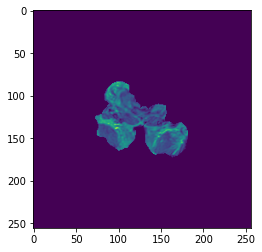

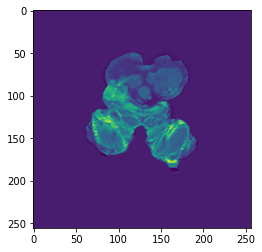

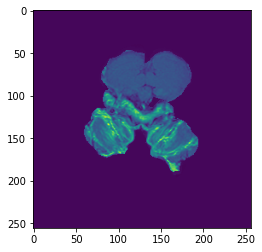

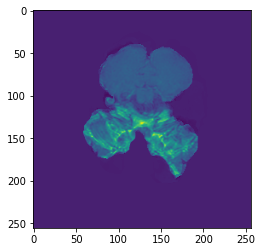

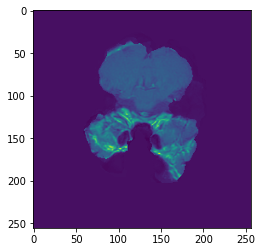

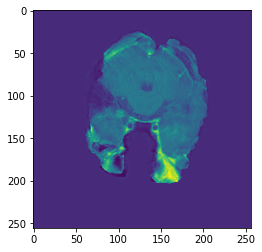

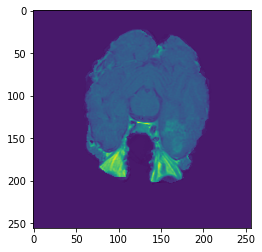

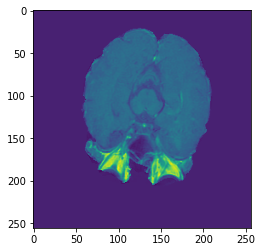

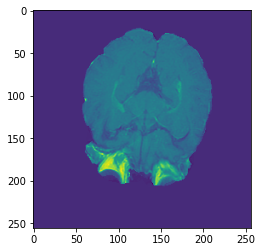

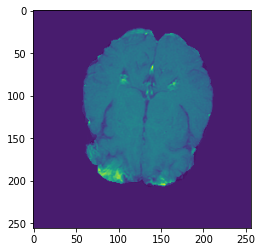

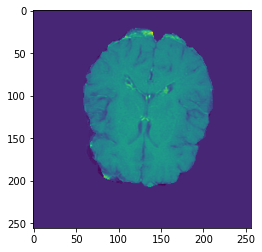

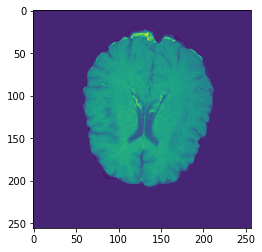

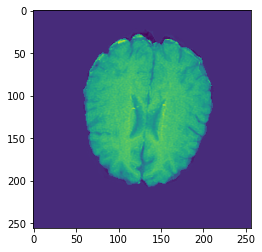

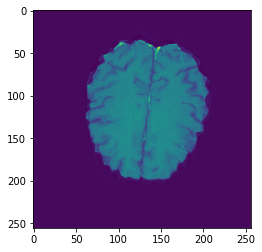

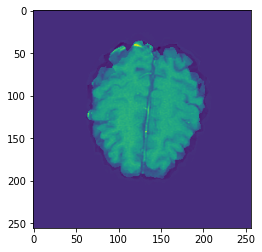

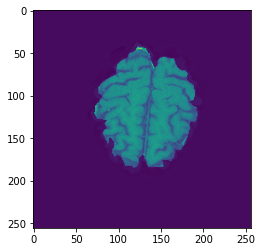

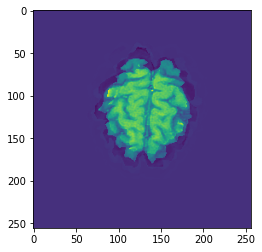

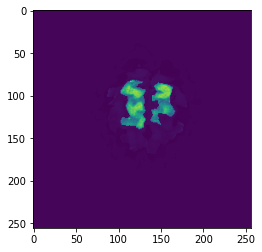

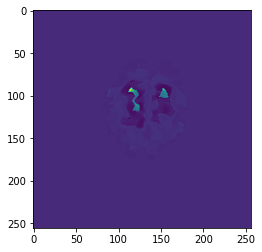

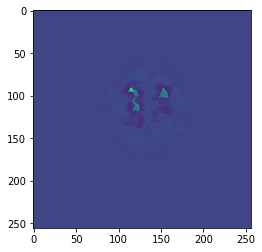

In [24]:
testing_img = same_size_arrays[5]
print(testing_img.shape)
print(type(testing_img))

# print(testing_img[:, :, :])

for i in range(testing_img.shape[0]):
  brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()

In [26]:
"""
size is not the same :(

find mean and standard deviation on the entire volume of one image - do we need size to be same for this?
^yes, but why?
 I should be taking the mean and standard deviation for each volume as a whole and then
 averaging that instead of taking it for each slice of each volume. Also, for normalization,
 the image size should be the same for all the scans with different volumes (which will also tie
into other preprocessing steps). Normalization is one part of preprocessing though

convert the array into a torch tensor
convert all pixel values into float32
make pixel value range from 0 to 1

if needed, volume reshaping (ndimage.zoom (resize first and then normalize))
create a new dataset with the preprocessed images

even if preprocessing works out well, you can't train a model based on images with different dimensions
"""

"\nsize is not the same :(\n\nfind mean and standard deviation on the entire volume of one image - do we need size to be same for this?\n^yes, but why?\n I should be taking the mean and standard deviation for each volume as a whole and then\n averaging that instead of taking it for each slice of each volume. Also, for normalization,\n the image size should be the same for all the scans with different volumes (which will also tie\ninto other preprocessing steps). Normalization is one part of preprocessing though\n\nconvert the array into a torch tensor\nconvert all pixel values into float32\nmake pixel value range from 0 to 1\n\nif needed, volume reshaping (ndimage.zoom (resize first and then normalize))\ncreate a new dataset with the preprocessed images\n\neven if preprocessing works out well, you can't train a model based on images with different dimensions\n"

In [107]:
def find_mean(volume):
  total_pixels = 256*256*20
  pixels_sum = 0
  # print(volume.shape)
  for i in range(20):
    current_slice = volume[i, :, :] # got the current slice
    current_slice_sum = current_slice.sum() # take sum of each slice
    # print(current_sum/256/256)
    pixels_sum += current_slice_sum # add the sum of all the slices
  # print(pixels_sum, total_pixels)
  return pixels_sum/total_pixels

In [108]:
print(find_mean(same_size_arrays[2]))
print(np.mean(same_size_arrays[2]))

34.91654663085937
34.916553


In [111]:
total_mean = 0
for i in same_size_arrays:
  total_mean += find_mean(i)
mean = total_mean/len(same_size_arrays)
print(mean)
print(np.mean(same_size_arrays))

65.24777874948755
65.24783


In [125]:
import math

def find_std(volume):
  total_pixels = 256*256*20
  squared_sum_error = 0
  # print(volume.shape)
  for i in range(20):
    current_slice = volume[i, :, :] # got the current slice
    squared_sum_error += ((current_slice-mean)**2).sum()
  return math.sqrt(squared_sum_error/total_pixels)

In [119]:
print(find_std(same_size_arrays[5]))
print(np.std(same_size_arrays[5]))

109.5696670546943
108.672295


In [122]:
total_std = 0
for i in same_size_arrays:
  total_std += find_std(i)
std = total_std/len(same_size_arrays)
print(std)
print(np.std(same_size_arrays))

136.49344329419276
148.11942


In [124]:
print("Mean: " + str(mean) + " ----- " + "Standard Deviation: " + str(std))

Mean: 65.24777874948755 ----- Standard Deviation: 136.49344329419276
